<a href="https://colab.research.google.com/github/gggggeun/study/blob/main/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D(Regression)/%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8%EC%9D%84%20%ED%8F%89%EA%B0%80%ED%95%98%EB%8A%94%20%ED%8F%89%EA%B0%80%EC%A7%80%ED%91%9C%EB%93%A4(evaluation%20metrics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀의 오류 지표(평가 지표) 알아보기
회귀모델의 오류(Regression error metrics)

## 회귀분석모델
회귀분석에 사용했던 데이터를 가지고 와보겠습니다. 

[Kaggle ](https://www.kaggle.com/harlfoxem/housesalesprediction) 

Dataset : House Sales in King County, USA 

In [ ]:
import pandas as pd
from google.colab import files
files.upload()

In [18]:
df = pd.read_csv('kc_house_data.csv')

In [19]:
# 2014년 train data
train = df.query('date.str.contains("2014")', engine='python')
train = train[['date','price','sqft_living','grade','sqft_above']]
train.head()

,date,price,sqft_living,grade,sqft_above
0,20141013T000000,221900.0,1180,7,1180
1,20141209T000000,538000.0,2570,7,2170
3,20141209T000000,604000.0,1960,7,1050
5,20140512T000000,1225000.0,5420,11,3890
6,20140627T000000,257500.0,1715,7,1715


In [20]:
# 2015년 test data
test=df.drop(train.index)
test=test[['date','price','sqft_living','grade','sqft_above']]
test.head()

,date,price,sqft_living,grade,sqft_above
2,20150225T000000,180000.0,770,6,770
4,20150218T000000,510000.0,1680,8,1680
7,20150115T000000,291850.0,1060,7,1060
8,20150415T000000,229500.0,1780,7,1050
9,20150312T000000,323000.0,1890,7,1890


In [21]:
#사이킷런으로 회귀모델 만들기
from sklearn.linear_model import LinearRegression
model = LinearRegression()
features = ['sqft_living']
target = ['price']
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]
# 모델 fit
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 회귀분석 평가지표/오류지표

생성한 선형회귀 모델을 평가하는 지표들을 차례로 살펴봅시다. 각각의 지표는 특성을 이해하고 상황에 맞게 사용해야 합니다.

선형회귀 모델에서 오류를 측정하는 방법으로 아래 예시를 통해 살펴보겠습니다.

- Mean Absolute Error
- Mean Square Error
- Root Mean Square Error
- R Squared
- Mean Absolute Percentage Error
- Mean Percentage Error

### 1.MAE

평균절대오차(Mean Absolute Error, MAE) 는 절대값한 예측 error들의 평균을 나타냅니다.

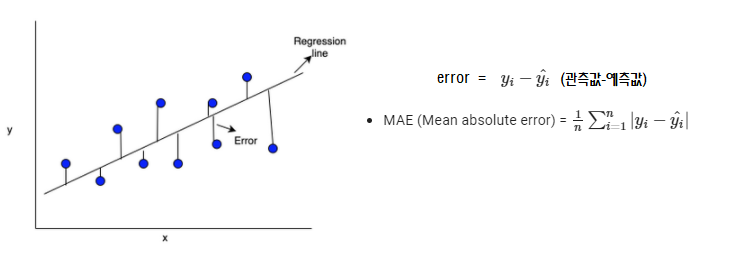

모델의 예측값과 실제값의 차이를 모두 더한다는 개념입니다.

- 절대값을 취하기 때문에 가장 직관적으로 알 수 있는 지표입니다.
- MSE 보다 특이치(outlier)에 영향을 적게받습니다.
- 절대값을 취하기 때문에 모델이 underperformance 인지 overperformance 인지 알 수 없습니다.
  - underperformance: 모델이 실제보다 낮은 값으로 예측
  - overperformance: 모델이 실제보다 높은 값으로 예측

In [22]:
from sklearn.metrics import mean_absolute_error

# 테스트 데이터 MAE
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')

MAE: 179300.30


### 2.MSE

 평균제곱오차 (Mean Squared Error,MSE) 는 제곱한 예측 error들의 평균을 나타냅니다.

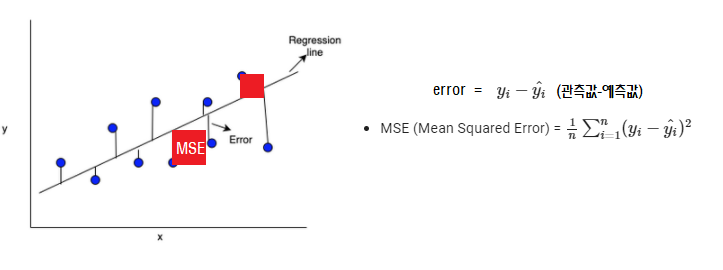

제곱을 하기 때문에 MAE와는 다르게 모델의 예측값과 실제값 차이의 면적의 합입니다. MAE 보다 오차값이 훨씬 큽니다. 이런 차이로, 특이값이 존재하면 수치가 많이 늘어나 특이값에 민감하다고 할 수 있습니다. 

In [48]:
#테스트 데이터 MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

MSE: 71091691178.27


### 3.RMSE

평균제곱오차의 제곱근(Root Mean Squared Error, RMSE) 는 MSE에 루트를 씌운 값 입니다.

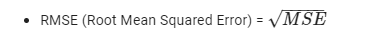

RMSE를 사용하면 오류 지표를 실제 값과 유사한 단위로 다시 변환하여 해석을 쉽게 합니다.

In [24]:
print(f'RMSE:  {mse**(1/2):,.2f}')

RMSE:  266,630.25


### 4.R Sqaured

결정계수(Coefficient of determination) R Sqaured는 관측치와 SSR(예측치와 평균의 차의 제곱)을 SST(관측치와 평균 차이의 제곱)로 나눈 값 

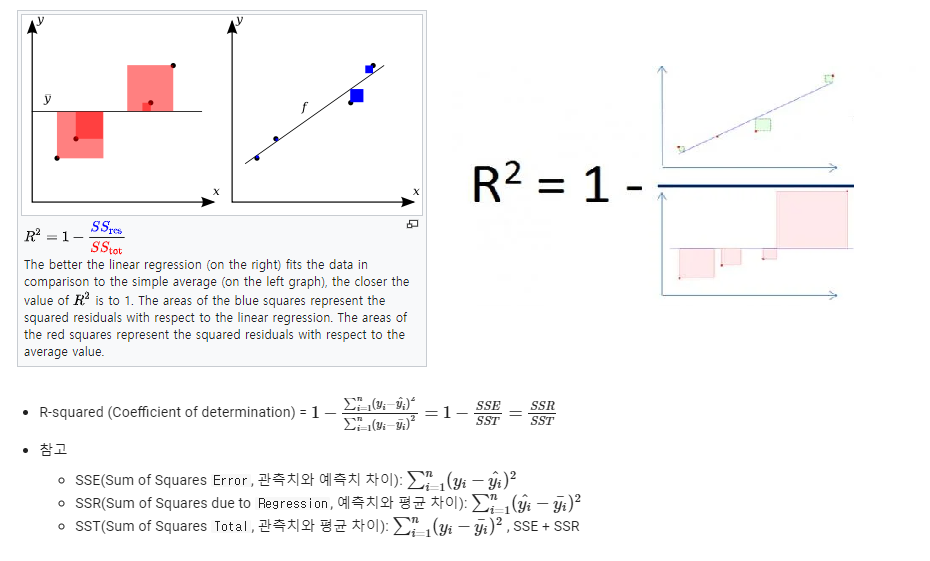

참고자료 

https://en.wikipedia.org/wiki/Coefficient_of_determination

https://blog.minitab.com/blog/statistics-and-quality-data-analysis/r-squared-sometimes-a-square-is-just-a-square

In [25]:
from sklearn.metrics import r2_score
r_square = r2_score(y_test, y_pred)
print(f'R Square: {r_square:.2f}')

R Square: 0.46


예측값이 실제값과 비슷하면 1에 가깝고, 비슷하지 않으면 0에 가깝다.
즉, R Squared 는 0과 1 사이의 값이다.

### 5.MAPE

(Mean Absolute Percentage Error,MAPE) 는 MAE를 퍼센트로 변환한 것입니다

- MAE와 마찬가지로 MSE보다 특이치에 영향을 적게 받습니다.(robust)
- MAE와 같은 단점을 가집니다.
- 추가적으로 모델에 대한 편향이 존재합니다. 이 단점에 대응하기 위해 MPE도 추가로 확인하는게 좋습니다.
- 0 근처의 값에서는 사용하기 어렵습니다.

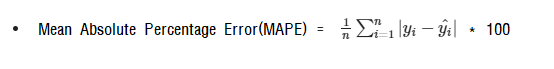

In [26]:
print(f'MAPE: {mae*100:.2f}')

MAPE: 17930030.06


### 6.MPE

 Mean Percentage Error(MPE)는 MAPE에서 절대값을 제외한 지표입니다. 아래와 같이 정의합니다.

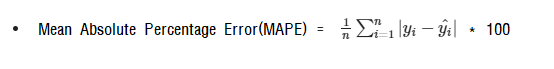

MPE의 가장 큰 장점은 모델이 underperformance 인지 overperformance 인지 판단 할 수 있다는 것입니다.

In [27]:
import numpy as np
def MPE(y_test, y_pred): 
    return np.mean((y_test - y_pred) / y_test) * 100
MPE(y_test, y_pred)

price   -9.66068
dtype: float64

### 요약
만들어진 회귀모델을 평가하는데는 다음과 같은 평가지표들이 있습니다.

* MSE (Mean Squared Error) = 
$\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2}$
* MAE (Mean absolute error) = $\frac{1}{n}\sum_{i=1}^{n}\left | y_{i} - \hat{y_{i}} \right |$
* RMSE (Root Mean Squared Error) = 
$\sqrt{MSE}$
* R-squared (Coefficient of determination) = 
$1 - \frac{\sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2}}{\sum_{i=1}^{n}(y_{i} - \bar{y_{i}})^{2}} = 1 - \frac{SSE}{SST} = \frac {SSR}{SST}$

- 참고
    - SSE(Sum of Squares `Error`, 관측치와 예측치 차이): $\sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2}$
    - SSR(Sum of Squares due to `Regression`, 예측치와 평균 차이): $\sum_{i=1}^{n}(\hat{y_{i}} - \bar{y_{i}})^{2}$
    - SST(Sum of Squares `Total`, 관측치와 평균 차이): $\sum_{i=1}^{n}(y_{i} - \bar{y_{i}})^{2}$ , SSE + SSR
- MAPE (Mean Absolute Percentage Error) = MAE * 100
- MPE (Mean Percentage Error) = 
$\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat{y_{i}})$ *100

In [47]:
import numpy as np
from sklearn import metrics
from sklearn import linear_model
models_and_scores = []

model_score = model.score(X_test,y_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = mse**(1/2)
r_square = metrics.r2_score(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)
def MPE(y_test, y_pred): 
    return np.mean((y_test - y_pred) / y_test) * 100
mpe = MPE(y_test, y_pred)

print(f'Model Score        :  {model_score:,.2f}')
print(f'MAE                :  {mae:,.2f}')
print(f'MSE                :  {mse:,.2f}')
print(f'RMSE               :  {rmse:,.2f}')
print(f'R Square           :  {r_square:,.2f}')
print(f'MAPE               :  {mae*100:.2f}')
print('MPE                : ', mpe)
print(f'Explained Variance :  {ev:,.2f}')

Model Score        :  0.46
MAE                :  179,300.30
MSE                :  71,091,691,178.27
RMSE               :  266,630.25
R Square           :  0.46
MAPE               :  17930030.06
MPE                :  price   -9.66068
dtype: float64
Explained Variance :  0.46
